# Foraging Theory
To test and apply the results from "Normative theory of foraging".

## Initial setup

In [2]:
# Numerical tools
import numpy as np

# Plotting tools
import matplotlib.pyplot as plt

# Ephys code
import sys
sys.path.insert(0, '../python/')
import ephys

mountainlab_pytools module not installed. Some functions from the ephys package may not be available.


## Homogeneous depleting environment

### Description
Math here :-)

### Single trial simulation

In [85]:
# Set initial parameters
lam_0 = 1.0
rho = 0.05

# Simulate piecewise-homogeneous Poisson process
K = int(lam_0/rho)
lam = lam_0
T_k = []
while lam > 0.0:
    t_k = ephys.Poisson(lam=lam).times(interevent=True, n=1)
    T_k.append(t_k)
    lam -= rho

# Check data
T_k = np.cumsum(np.array(T_k))
assert T_k.shape[0] == K

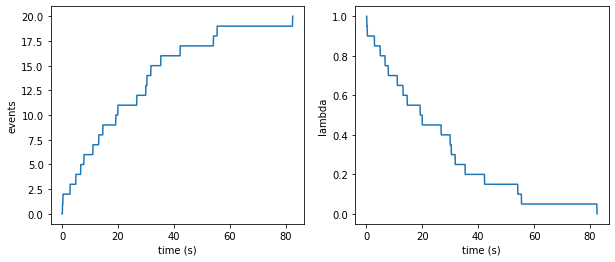

In [86]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Compute number of events K as function of t
t = np.linspace(0.0, T_k.max(), 1000)
K_t = np.zeros(t.shape)
K_t[np.searchsorted(t, T_k, side='left')] = 1
K_t = np.cumsum(K_t)

# Plot K vs. t
ax[0].plot(t, K_t)
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('events')

# Compute lambda as function of t
lam_t = lam_0*np.ones(t.shape) - rho*K_t

# Plot lamba vs. t
ax[1].plot(t, lam_t)
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('lambda');

### Batch simulation
Let's now average the statistics over many trials to approximate the limit of a continuous distribution.

In [111]:
# Set initial parameters
lam_0 = 1.0
rho = 0.05

# Simulate process
N = 10000 # number of trials
K = int(lam_0/rho) # max number of events
t_k = np.empty([N, K])
for i in range(K):
    lam = lam_0 - rho*i
    t_k[:, i] = ephys.Poisson(lam=lam).times(interevent=True, n=N)

T_k = np.cumsum(t_k, axis=1) # cumulative event times

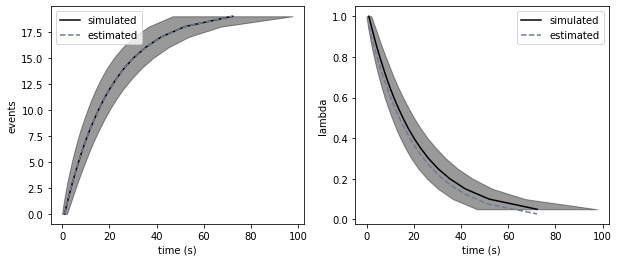

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
cmap = plt.get_cmap('bone')

# Plot K vs. t
ax[0].plot(np.mean(T_k, axis=0), 
           np.arange(K),
           color=cmap(0.0),
           label='simulated')
ax[0].fill_betweenx(np.arange(K),
                    x1=np.mean(T_k, axis=0)-np.std(T_k, axis=0),
                    x2=np.mean(T_k, axis=0)+np.std(T_k, axis=0),
                    color=cmap(0.0),
                    alpha=0.4)
ax[0].plot(np.cumsum(1.0/(lam_0 - rho*np.arange(K))), 
           np.arange(K),
           color=cmap(0.5),
           linestyle='--',
           label='estimated')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel('events')
ax[0].legend()

# Plot lambda vs. t
ax[1].plot(np.mean(T_k, axis=0), 
           lam_0 - rho*np.arange(K),
           color=cmap(0.0),
           label='simulated')
ax[1].fill_betweenx(lam_0 - rho*np.arange(K),
                    x1=np.mean(T_k, axis=0)-np.std(T_k, axis=0),
                    x2=np.mean(T_k, axis=0)+np.std(T_k, axis=0),
                    color=cmap(0.0),
                    alpha=0.4)
ax[1].plot(np.mean(T_k, axis=0), 
           lam_0*np.exp(-rho*np.mean(T_k, axis=0)),
           color=cmap(0.5),
           linestyle='--',
           label='estimated')
ax[1].set_xlabel('time (s)')
ax[1].set_ylabel('lambda')
ax[1].legend();

Note that as $\rho \rightarrow 0$, the estimated $\lambda(t)$ becomes a better approximation.